In [704]:
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

In [705]:
df=pd.read_csv(r"C:\Users\HP\Desktop\mail_spam.csv",encoding='latin1')

df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [706]:
df.shape

(5572, 5)

In [707]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [708]:
df.drop(['Unnamed: 2'], axis=1,inplace=True)

In [709]:
df.drop(['Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [710]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis (EDA)

In [711]:
df.shape

(5572, 2)

In [712]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [713]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [714]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [715]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [716]:
df['v1'].nunique()

2

In [717]:
df.sample()

,v1,v2
1449,ham,say thanks2.


In [718]:
#Checking for duplicates and removing them

df.drop_duplicates(inplace = True)

In [719]:
# checking  new shape the data after removing duplicate values

df.shape

(5169, 2)

In [720]:
#checking missing data

df.isnull().sum()

v1    0
v2    0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

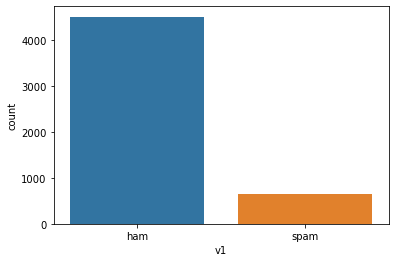

In [723]:
sns.countplot(df['v1'])

From the above countplot, ham mail is more than spam mail

In [726]:
comment_len = df.v2.str.len()
df.v2.str.len().median()

60.0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


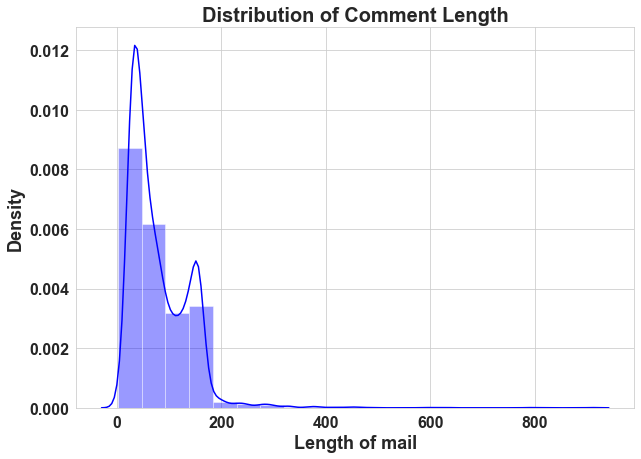

In [728]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.v2.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of mail', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

Above is a plot showing the mail length frequency. As noticed, most of the comments are short with only a few comments longer than 200 words. Majority of the comments are of length 100, where maximum length is 800 and minimum length is 5. Median length being 50.

# Encording the target variable

In [730]:
from sklearn import preprocessing

In [731]:
label_encoder = preprocessing.LabelEncoder()

In [732]:
df['v1']= label_encoder.fit_transform(df['v1'])

In [733]:
df['v1'].unique()


array([0, 1])

# Data Cleaning process:

In [734]:
# Download the stopwords package

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [735]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [736]:
def process_text(v2):
    #1 remove punctuation
    nopunc = [char for char in v2 if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 remove stopwords
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # return clean_words
    
    return clean_words

In [737]:
# show the tokenization (a list of token also called lemmas)

df['v2'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [738]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

In [739]:
# convert the collection of v2 to a matriz of tokens

cv = CountVectorizer(analyzer=process_text).fit_transform(df['v2'])
print(cv)

  (0, 2027)	1
  (0, 7456)	1
  (0, 8809)	1
  (0, 5685)	1
  (0, 1096)	1
  (0, 5136)	1
  (0, 8231)	1
  (0, 6846)	1
  (0, 11043)	1
  (0, 7567)	1
  (0, 6131)	1
  (0, 5135)	1
  (0, 1461)	1
  (0, 6815)	1
  (0, 4574)	1
  (0, 10845)	1
  (1, 3012)	1
  (1, 7600)	1
  (1, 2407)	1
  (1, 10952)	1
  (1, 10582)	1
  (1, 8482)	1
  (2, 1909)	1
  (2, 6244)	2
  (2, 422)	1
  :	:
  (5165, 6791)	1
  (5165, 11239)	1
  (5165, 6604)	1
  (5165, 6267)	1
  (5166, 8147)	1
  (5166, 3169)	1
  (5166, 3655)	1
  (5166, 10087)	1
  (5167, 7698)	1
  (5167, 10886)	1
  (5167, 8314)	1
  (5167, 10669)	1
  (5167, 6612)	1
  (5167, 9804)	1
  (5167, 6196)	1
  (5167, 6710)	1
  (5167, 5169)	1
  (5167, 7297)	1
  (5167, 6892)	1
  (5167, 7190)	1
  (5167, 4430)	1
  (5167, 4973)	1
  (5168, 8243)	1
  (5168, 10532)	1
  (5168, 3370)	1


In [740]:
cv.shape

(5169, 11304)

Spliting the data into training and testing

In [741]:
from sklearn.model_selection import train_test_split

In [742]:
x_train,x_test,y_train,y_test=train_test_split(cv,df['v1'],test_size=0.20,random_state=0)

In [743]:
x_train.shape

(4135, 11304)

In [744]:
y_test.shape

(1034,)

In [745]:
y_train.shape

(4135,)

In [746]:
y_test.shape

(1034,)

# Model building

In [747]:
# Model building on testing dataset

classifier=MultinomialNB()

In [748]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [749]:
pred=classifier.predict(x_test)

In [750]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [751]:
print(accuracy_score(y_test,pred))

0.9555125725338491


In [757]:
cm = confusion_matrix(y_test, pred)
cm

array([[850,  35],
       [ 11, 138]], dtype=int64)

<AxesSubplot:>

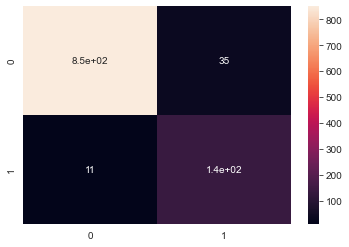

In [759]:
sns.heatmap(cm,annot=True)

In [768]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034



In [769]:
# model building on training dataset

classifier=MultinomialNB()
classifier.fit(x_train,y_train)
pred1=classifier.predict(x_train)
pred1

print('accuracy_score =  \n',accuracy_score(y_train,pred1))


print('confusion_metrix=  \n',confusion_matrix(y_train,pred1))


print('classification_report= \n',classification_report(y_train,pred1))

accuracy_score =  
 0.9954050785973397
confusion_metrix=  
 [[3623    8]
 [  11  493]]
classification_report= 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135



In [770]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [771]:
cv_accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
cv_accuracies

array([0.95652174, 0.95169082, 0.97342995, 0.96859903, 0.98067633,
       0.968523  , 0.96368039, 0.96610169, 0.95157385, 0.968523  ])

In [772]:
cv_accuracies.mean()

0.9649319811442141

In [773]:
cv_accuracies.std()

0.008870022514465429

In [774]:
#compare to actual values and predicted value

print('predicted value',pred)
print('actual value',y_test)

predicted value [0 0 0 ... 0 0 0]
actual value 1851    0
2375    0
2743    0
3324    0
3995    0
       ..
2237    0
4368    0
3046    0
4263    0
2674    0
Name: v1, Length: 1034, dtype: int32


In [775]:
df1 = pd.DataFrame(pred)
df1.to_csv('mnb.prediction.csv')
df1


,0
0,0
1,0
2,0
3,0
4,0
...,...
1029,0
1030,0
1031,0
1032,0


# Finally, we had predicted over the data and the predictions obtained were saved in a csv file.